# Week 10 Assignment

In this week's lecture lab we examined two dimensionality reduction techniques, Principal Component Analysis (PCA) and the Autoencoder. In this assignment we will explore additional functionalities of the Autoencoder and demonstrate its incredible versatility.

# Part A - Imports and Data Prep

All required imports have been made for you.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.nn.functional as F
from numpy.random import normal
from tensorflow.keras.datasets.mnist import load_data
import random
random.seed(100)
plt.style.use('seaborn')
from torch.utils.data import TensorDataset

# Part B - Noise Reduction

The autoencoder serves many purposes. You have already seen it's ability to perform dimensionality reduction and now you will see how it can perform noise reduction. 

# Q1 List an additional functionality of an autoencoder (that has not been mentioned yet) in the space provided below.

marks allocated for listing valid application i.e., 
Anomaly Detection

# Q2 
To illustrate the ability of our autoencoder to reduce noise we will be using image data. Use the load_data function with the path attribute set to "mnist.npz". You only care about the image data so you need to extract the images from the imported data and get rid of the labels. Ensure your pixel values are between 0 and 1 and save this to the variable X_2

To simulate a noisy image, we will be adding white Gausian noise to the data. To do this, you will need to use the normal function with a mean of 0 and a varience of 0.1. Cycle through the images in X_2, add noise, and save to a variable called X_2_noise.

Display the first image in X_2 and the first image in X_2_noise to see the effect of the noise you added

In [ ]:
# marks allocated for importing using the load data fuction and for normalizing the pixel values
X_2 = load_data(path="mnist.npz")[0][0]/255
row,col = X_2[0].shape

In [ ]:
# marks allocated for adding noise correctly
# There are two possible options for the noise -- if you follow the assignment you should use 0.1**0.5 and if you follow the annoucement 0.3**0.5. 
# During the lab session it was said that students can use 0.3 as an approximation of 0.1**0.5
# Remeber the normal function takes a value for standard deviation so you must take the sqrt of the variance.
X_2_noise= load_data(path="mnist.npz")[0][0]/255
for i in range(len(X_2_noise)):
    X_2_noise[i] += normal(0,0.1**0.5, (row,col)).reshape(row,col)

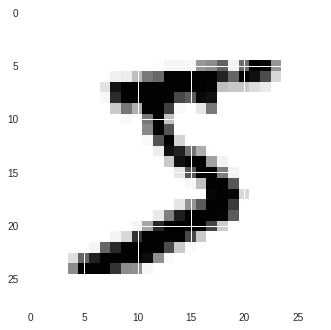

In [ ]:
#marks allocated  for showing the original image
plt.imshow(X_2[0])
plt.show()

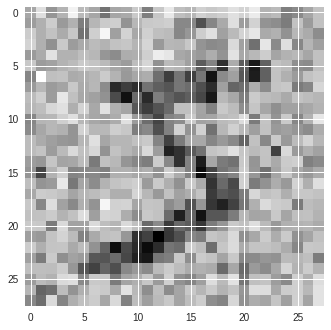

In [ ]:
# marks allocated  for showing the noisy image
plt.imshow(X_2_noise[0])
plt.show()

# Q3 Create an autoencoder to de-noise the image. You are responsible for selecting an appropriate design for the autoencoder. To speed up your training, for each iteration, train on a small subset of the data. 

In [ ]:
#define model 
denoiser = nn.Sequential(
    nn.Linear(784,128),
    nn.ReLU(),
    nn.Linear(128,784),
    #since you are dealing with an image, you want your output values to be between 0 and 1. 
    #during the lab session it was explicitly stated that your final layer activation MUST be sigmoid to ensure this condition is met.
    # marks will be deducted for not following this.
    nn.Sigmoid()
)

#define loss function 
loss_fn = torch.nn.MSELoss()

#define learning rate 
learning_rate = 1e-1

#convert dataset to tensors 
tensor_imgs_noisy = torch.from_numpy(np.array(X_2_noise.reshape(60000,784)).astype(np.float32))
tensor_imgs_orig = torch.from_numpy(np.array(X_2.reshape(60000,784)).astype(np.float32))

# variables for batch selection 
# for simplicity and to speed up running we exclude this from the loop however this is bad practice (but we will allow it for this assignment) since you are only training on the same subset of images.
# However, as you have seen, the autoencoder does not need much to learn what noise is and how to remove it. 
N = 64
indices = [i for i in range (tensor_imgs_noisy.shape[0])]

#train model 
for t in range (30000):
  #create batch 

  batch_ind = random.sample(indices, N)

  y_pred = denoiser(tensor_imgs_noisy[batch_ind])
  loss = loss_fn(y_pred, tensor_imgs_orig[batch_ind])
  if t % 1000 == 999:
        print(t, loss.item())
  denoiser.zero_grad()
  loss.backward()
  with torch.no_grad():
        for param in denoiser.parameters():
            param -= learning_rate * param.grad 

999 0.0935555174946785
1999 0.07148954272270203
2999 0.06972430646419525
3999 0.06980235874652863
4999 0.07019846886396408
5999 0.07110725343227386
6999 0.06463541090488434
7999 0.061322350054979324
8999 0.06189057230949402
9999 0.06360667943954468
10999 0.0558922253549099
11999 0.05275590717792511
12999 0.053683191537857056
13999 0.055132728070020676
14999 0.05089152604341507
15999 0.051726728677749634
16999 0.04712866619229317
17999 0.05077403038740158
18999 0.0496155247092247
19999 0.044204454869031906
20999 0.042943075299263
21999 0.04207111522555351
22999 0.04330941289663315
23999 0.04356592148542404
24999 0.04159555956721306
25999 0.04139439016580582
26999 0.04321090504527092
27999 0.04027370363473892
28999 0.04255746304988861
29999 0.03888671100139618


# Q4 
Pass the images through your trained denoiser. Create two distributions measuring the amount of noise before and after the denoiser (you can build this distribution on a subset of the data to reduce the time it takes to generate). Display three images, an image of a noisy sample, and image of a denoised sample, and an image of a clear sample.


In [ ]:
denoised_samples = denoiser(tensor_imgs_noisy)
denoised_samples = denoised_samples.detach().numpy()


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'PDF of Noise Across Noisy Image Dataset')

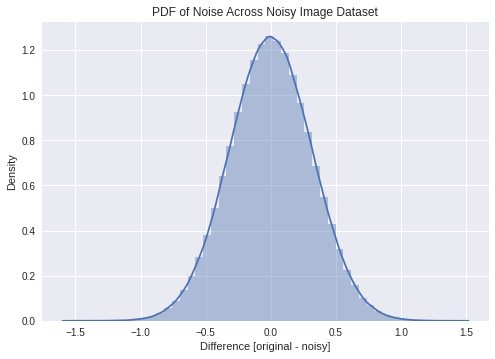

In [ ]:
# original - noisy 
sns.distplot(X_2[0:1000] - X_2_noise[0:1000],norm_hist = True)
plt.xlabel("Difference [original - noisy]")
plt.ylabel("Density")
plt.title("PDF of Noise Across Noisy Image Dataset")

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'PDF of Noise Across Noisy Image Dataset')

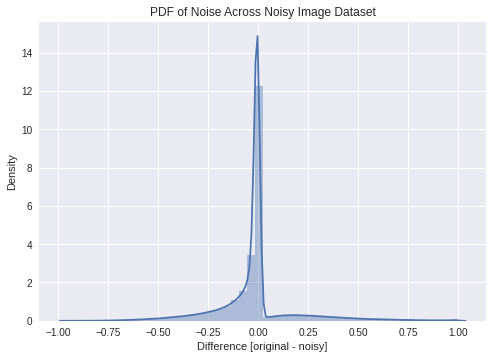

In [ ]:
# original - denoised 
sns.distplot(X_2.reshape(60000,784)[0:1000] - denoised_samples[0:1000],norm_hist = True)
plt.xlabel("Difference [original - noisy]")
plt.ylabel("Density")
plt.title("PDF of Noise Across Noisy Image Dataset")

Text(0.5, 1.0, 'Denoised')

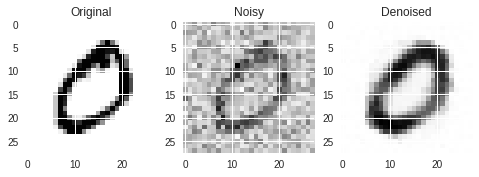

In [ ]:
# original vs. noisy vs. denoised
fig, axs = plt.subplots(1,3)
axs[0].imshow(X_2[1])
axs[0].set_title("Original")
axs[1].imshow(X_2_noise[1])
axs[1].set_title("Noisy")
axs[2].imshow(denoised_samples[1].reshape(28,28))
axs[2].set_title("Denoised")

# Congratulations you have completed this week's assingment. Please remeber to restart and run all cells before submitting.